# Profile
Nama : Austin Christian Yonatan

## Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from wordcloud import WordCloud
#Split data
from sklearn.model_selection import train_test_split 


# preprosessing
import re
import string
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split


# download nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# pipeline preprocessing
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
# sequential API
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, BatchNormalization, Dropout, TextVectorization, Embedding, GlobalAveragePooling1D
# funtional API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
# classification report & confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bloodink\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bloodink\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Bloodink\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Bloodink\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


---
## Data Loading

In [5]:
df_fake=pd.read_csv("Fake.csv")
df_fake["label"]=0
df_true=pd.read_csv("True.csv")
df_true["label"]=1

df= pd.concat([df_true, df_fake])
df

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [7]:
df_copy=df.copy()

In [8]:
df.isna().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

<AxesSubplot:xlabel='subject', ylabel='count'>

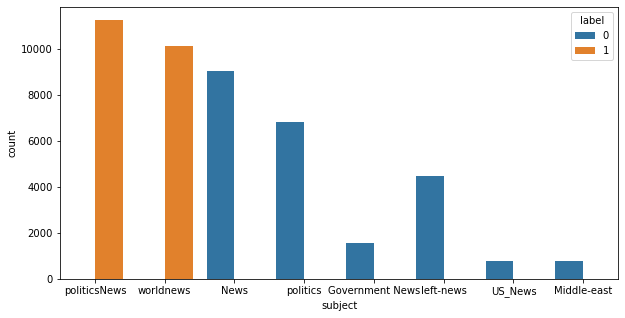

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(x="subject", hue="label", data=df)

<AxesSubplot:xlabel='subject', ylabel='count'>

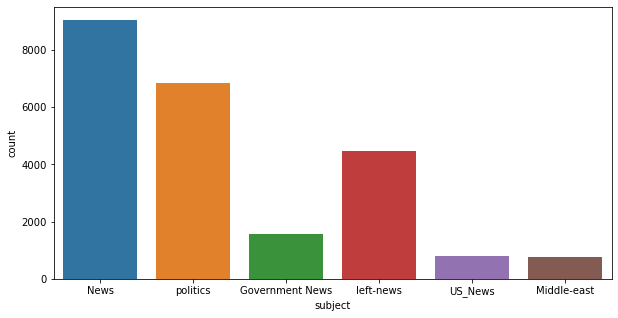

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(x="subject", data=df_fake)

<AxesSubplot:xlabel='subject', ylabel='count'>

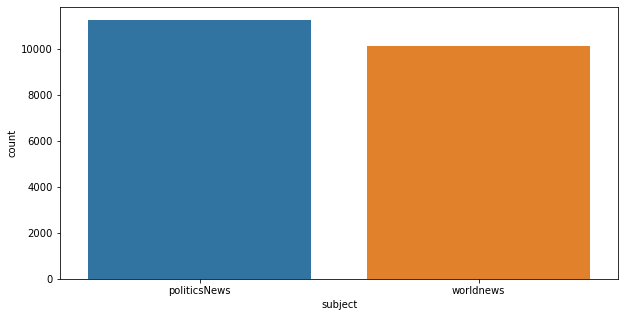

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x="subject", data=df_true)

In [12]:
df[df['subject']=='News'].head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [13]:
df[df['subject']=='worldnews'].head()

,title,text,subject,date,label
11272,Reuters journalists in Myanmar appear in court...,YANGON (Reuters) - Two Reuters journalists who...,worldnews,"December 27, 2017",1
11273,Kuwait says GCC to keep operating despite Qata...,DUBAI (Reuters) - Kuwait s deputy foreign mini...,worldnews,"December 27, 2017",1
11274,Nigeria says U.S. agrees delayed $593 million ...,ABUJA (Reuters) - The United States has formal...,worldnews,"December 27, 2017",1
11275,Syrian rebels say discussing evacuation from t...,BEIRUT (Reuters) - Syrian rebels in a pocket o...,worldnews,"December 27, 2017",1
11276,"Trump to host Norway's Solberg on Jan. 10, Whi...",WASHINGTON (Reuters) - U.S. President Donald T...,worldnews,"December 27, 2017",1


0    23481
1    21417
Name: label, dtype: int64

0    52.298543
1    47.701457
Name: label, dtype: float64


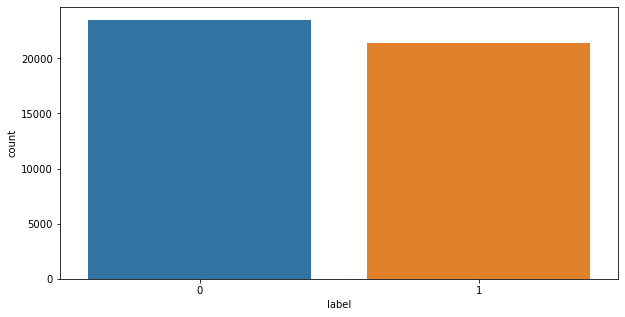

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x="label", data=df)
# Number of unique value
print(df["label"].value_counts())
print()
print(df["label"].value_counts(normalize=True)*100)

In [19]:
all_text= ' '.join (list(df['text'].values))


wc= WordCloud(background_color='black', #background gambar
    max_words=5000 #jumlah maksimal kata
    )

<function matplotlib.pyplot.show(close=None, block=None)>

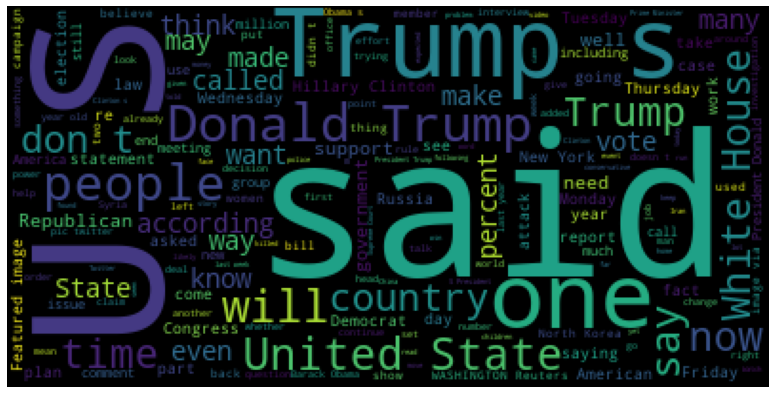

In [20]:
wc.generate(all_text)
plt.figure(figsize = [15, 7])
plt.imshow(wc)
plt.axis("off")
plt.show

In [21]:
t_text= ' '.join(list(df[df['label']==1]['text'].values))
f_text= ' '.join(list(df[df['label']==0]['text'].values))


<function matplotlib.pyplot.show(close=None, block=None)>

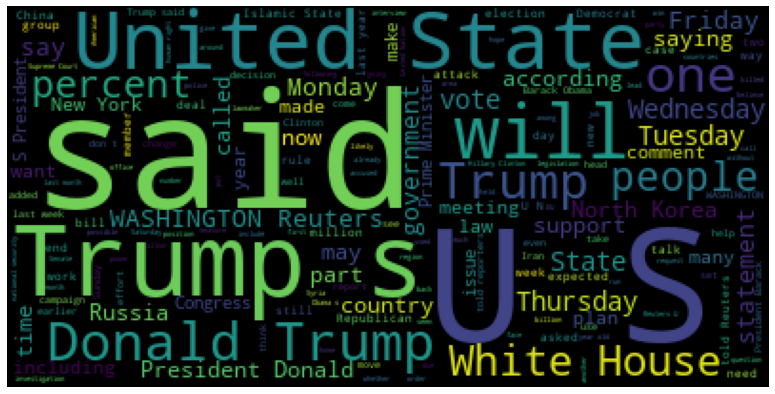

In [22]:
wc.generate(t_text)
plt.figure(figsize = [15, 7])
plt.imshow(wc)
plt.axis("off")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

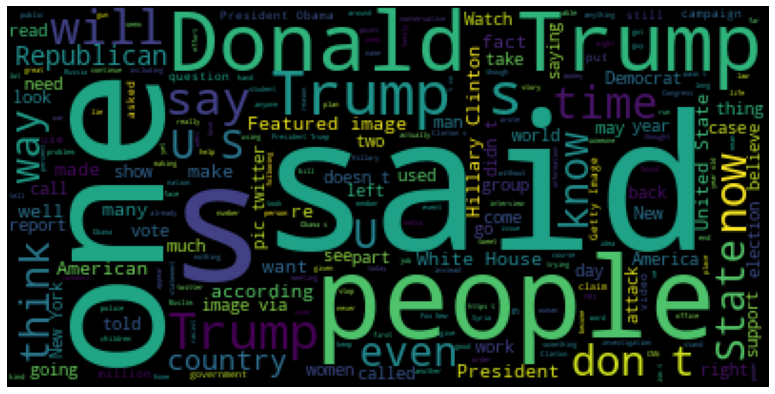

In [23]:
wc.generate(f_text)
plt.figure(figsize = [15, 7])
plt.imshow(wc)
plt.axis("off")
plt.show

Data Preprosessing

In [24]:
df.drop(columns=['title', 'subject', 'date'], inplace=True)

In [25]:
data_inf= df.sample(10, random_state=10)
data_inf

,text,label
3040,WASHINGTON (Reuters) - U.S. Senate Democratic ...,1
20195,"Swedish resident, Rosa Vidarsdottir tells a ha...",0
6040,WASHINGTON (Reuters) - The White House denied ...,1
9325,NBC was in cover your ass mode with their lo...,0
19492,"SRINAGAR, India (Reuters) - Militants attacked...",1
10409,WASHINGTON (Reuters) - Secretary of State John...,1
10413,President Trump s deputy assistant Sebastian G...,0
6082,Donald Trump s idiotic followers may believe t...,0
15734,BEIRUT (Reuters) - Syrian government forces wi...,1
15780,Because nothing says justice for Freddie Gra...,0


In [26]:
# Drop data inference pada data untuk train dan test
data_train_test= df.drop(data_inf.index)
data_train_test

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1
...,...,...
23476,21st Century Wire says As 21WIRE reported earl...,0
23477,21st Century Wire says It s a familiar theme. ...,0
23478,Patrick Henningsen 21st Century WireRemember ...,0
23479,21st Century Wire says Al Jazeera America will...,0


In [27]:
#reset index
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

In [62]:
data_train_test[data_train_test['text'].str.contains('U.S.')]

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1
...,...,...
44861,Episode #119 of SUNDAY WIRE SHOW finally resum...,0
44864,"21st Century Wire says So far, after nearly 20...",0
44868,"21st Century Wire says This week, the historic...",0
44872,Robert Fantina CounterpunchAlthough the United...,0


In [51]:
data_train_test[data_train_test['text'].str.contains('U.S.A.', regex=False)].head()

,text,label
2063,WASHINGTON (Reuters) - Fujifilm Medical System...,1
2313,The following statements were posted to the ve...,1
4258,WASHINGTON (Reuters) - U.S. President Donald T...,1
4306,The following statements were posted to the ve...,1
4678,"HUNTINGTON BEACH, Calif. (Reuters) - Supporter...",1


In [65]:
print(data_train_test['text'][2313])

The following statements were posted to the verified Twitter accounts of U.S. President Donald Trump, @realDonaldTrump and @POTUS.  The opinions expressed are his own. Reuters has not edited the statements or confirmed their accuracy.  @realDonaldTrump : - Thank you West Virginia! All across the country, Americans of every kind are coming together w/one simple goal: to MAKE AMERICA GREAT AGAIN!  [0019 EDT] - Toyota & Mazda to build a new $1.6B plant here in the U.S.A. and create 4K new American jobs. A great investment in American manufacturing! [0602 EDT] - ....and don’t forget that Foxconn will be spending up to 10 billion dollars on a top of the line plant/plants in Wisconsin. [0621 EDT] - Consumer confidence is at a 16 year high....and for good reason. Much more regulation “busting” to come. Working hard on tax cuts & reform! [0626 EDT] -- Source link: (bit.ly/2jBh4LU) (bit.ly/2jpEXYR) 


In [63]:
data_train_test[data_train_test['text'].str.contains('USA')].head()

,text,label
27,The following statements were posted to the ve...,1
218,(Reuters) - Three of the women who have accuse...,1
219,WASHINGTON/NEW YORK (Reuters) - As Republicans...,1
555,WASHINGTON (Reuters) - The tax overhaul pushed...,1
660,WASHINGTON (Reuters) - President Donald Trump ...,1


In [64]:
data_train_test[data_train_test['text'].str.contains('US')].head()

,text,label
5,"WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",1
7,The following statements were posted to the ve...,1
8,The following statements were posted to the ve...,1
12,The following statements were posted to the ve...,1
13,The following statements were posted to the ve...,1


In [96]:
test= re.sub(r"bit.ly\S+", " ", "source (bit.ly/2jBh4LU)")
test

'source ( '

In [82]:
print('Text sample:\n', data_train_test['text'][27])

Text sample:
 The following statements were posted to the verified Twitter accounts of U.S. President Donald Trump, @realDonaldTrump and @POTUS.  The opinions expressed are his own. Reuters has not edited the statements or confirmed their accuracy.  @realDonaldTrump : - Our big and very popular Tax Cut and Reform Bill has taken on an unexpected new source of “love” - that is big companies and corporations showering their workers with bonuses. This is a phenomenon that nobody even thought of, and now it is the rage. Merry Christmas! [0747 EST] - At some point, and for the good of the country, I predict we will start working with the Democrats in a Bipartisan fashion. Infrastructure would be a perfect place to start. After having foolishly spent $7 trillion in the Middle East, it is time to start rebuilding our country! [0805 EST] - “The President has accomplished some absolutely historic things during this past year.” Thank you Charlie Kirk of Turning Points USA. Sadly, the Fake Mainstr

In [83]:
# Menggantti US atau U.S. atau USA atau U.S.A menjadi United States
sample1 = re.sub("U.S.A|U.S.","United States", data_train_test['text'][27]) 
sample1 = re.sub("USA|US","United States", sample1) 
print('Text sample:\n', sample1)

Text sample:
 The following statements were posted to the verified Twitter accounts of United States President Donald Trump, @realDonaldTrump and @POTUnited States.  The opinions expressed are his own. Reuters has not edited the statements or confirmed their accuracy.  @realDonaldTrump : - Our big and very popular Tax Cut and Reform Bill has taken on an unexpected new source of “love” - that is big companies and corporations showering their workers with bonuses. This is a phenomenon that nobody even thought of, and now it is the rage. Merry Christmas! [0747 EST] - At some point, and for the good of the country, I predict we will start working with the Democrats in a Bipartisan fashion. Infrastructure would be a perfect place to start. After having foolishly spent $7 trillion in the Middle East, it is time to start rebuilding our country! [0805 EST] - “The President has accomplished some absolutely historic things during this past year.” Thank you Charlie Kirk of Turning Points United S

In [84]:
# ubah menjadi huruf kecil
sample1= sample1.lower()
print(sample1)

the following statements were posted to the verified twitter accounts of united states president donald trump, @realdonaldtrump and @potunited states.  the opinions expressed are his own. reuters has not edited the statements or confirmed their accuracy.  @realdonaldtrump : - our big and very popular tax cut and reform bill has taken on an unexpected new source of “love” - that is big companies and corporations showering their workers with bonuses. this is a phenomenon that nobody even thought of, and now it is the rage. merry christmas! [0747 est] - at some point, and for the good of the country, i predict we will start working with the democrats in a bipartisan fashion. infrastructure would be a perfect place to start. after having foolishly spent $7 trillion in the middle east, it is time to start rebuilding our country! [0805 est] - “the president has accomplished some absolutely historic things during this past year.” thank you charlie kirk of turning points united states. sadly, 

In [85]:
sample1=re.sub("@[A-Za-z0-9_]+"," ", sample1) #remove @
sample1=re.sub("#[A-Za-z0-9_]+"," ", sample1) #remove hashtag
sample1=re.sub(r"http\S+", " ", sample1) 
sample1=re.sub(r"www.\S+", " ", sample1) 
sample1=re.sub(r"bit.ly\S+", " ", sample1) 
sample1=re.sub()

'the following statements\xa0were posted to the verified twitter accounts of united states president donald trump,   and   states.  the opinions expressed are his own.\xa0reuters has not edited the statements or confirmed their accuracy.    : - our big and very popular tax cut and reform bill has taken on an unexpected new source of “love” - that is big companies and corporations showering their workers with bonuses. this is a phenomenon that nobody even thought of, and now it is the rage. merry christmas! [0747 est] - at some point, and for the good of the country, i predict we will start working with the democrats in a bipartisan fashion. infrastructure would be a perfect place to start. after having foolishly spent $7 trillion in the middle east, it is time to start rebuilding our country! [0805 est] - “the president has accomplished some absolutely historic things during this past year.” thank you charlie kirk of turning points united states. sadly, the fake mainstream media will n

In [77]:
# menghilangkan tanda baca
sample1=sample1.translate(str.maketrans("","",string.punctuation))
sample1

'the following statements\xa0were posted to the verified twitter accounts of united states president donald trump realdonaldtrump and potunited states  the opinions expressed are his own\xa0reuters has not edited the statements or confirmed their accuracy  realdonaldtrump   our big and very popular tax cut and reform bill has taken on an unexpected new source of “love”  that is big companies and corporations showering their workers with bonuses this is a phenomenon that nobody even thought of and now it is the rage merry christmas 0747 est  at some point and for the good of the country i predict we will start working with the democrats in a bipartisan fashion infrastructure would be a perfect place to start after having foolishly spent 7 trillion in the middle east it is time to start rebuilding our country 0805 est  “the president has accomplished some absolutely historic things during this past year” thank you charlie kirk of turning points united states sadly the fake mainstream med

source link?

In aggregated query without GROUP BY, expression #1 of SELECT list contains nonaggregated column 'task_db.books.title'; this is incompatible with sql_mode=only_full_group_by

In [78]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stopword = list(set(stopwords.words('english')))

token=word_tokenize(sample)

sample_stopword=' '.join([word for word in token if word not in stopword])
sample_stopword

'following statements posted verified twitter accounts united states president donald trump realdonaldtrump potunited states opinions expressed reuters edited statements confirmed accuracy realdonaldtrump big popular tax cut reform bill taken unexpected new source “ love ” big companies corporations showering workers bonuses phenomenon nobody even thought rage merry christmas 0747 est point good country predict start working democrats bipartisan fashion infrastructure would perfect place start foolishly spent 7 trillion middle east time start rebuilding country 0805 est “ president accomplished absolutely historic things past year ” thank charlie kirk turning points united states sadly fake mainstream media never talk accomplishments end year reviews compiling long beautiful list 0917 est administration done legislative approvals broke harry truman ’ record regulation cutting judicial appointments building military va tax cunited states reform record economystock market much sure great